# Feature detection

## Harris Corner detection

As always we start with the imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

As a start we will use the same checkerboard image as earlier.

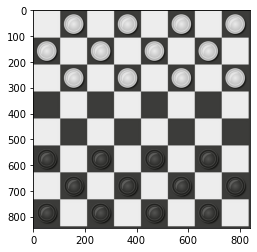

In [2]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [cv2.cornerHarris](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cornerharris). Afterwards we would like to draw the location of the detected corners on the image and display it.

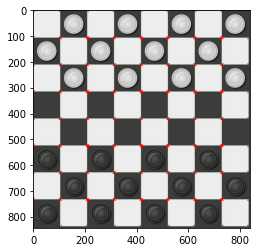

In [3]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

dst = cv2.cornerHarris(gray,2,21,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_corner = img.copy()
threshold = 0.01

img_corner[dst>threshold*dst.max()]=[255,0,0]


# Display image
plt.imshow(img_corner)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV the function is called [cv2.goodFeaturesToTrack](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack). 
Let's start with a different image this time.

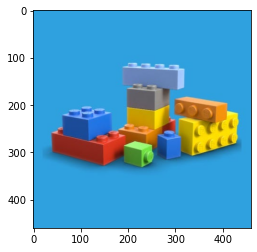

In [4]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

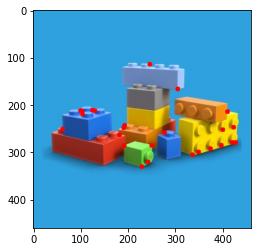

In [5]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_goodFeatures = img.copy()

corners = cv2.goodFeaturesToTrack(gray,maxCorners=25, qualityLevel=0.05, minDistance=0)
corners = np.uint16(corners)
#print(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_goodFeatures,(x,y),5,(255,0,0),-1)


# Display image
plt.imshow(img_goodFeatures)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

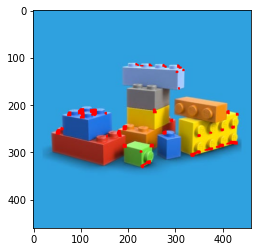

In [6]:
dst = cv2.cornerHarris(gray,8,3,0.1)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_corner = img.copy()
threshold = 0.1

img_corner[dst>threshold*dst.max()]=[255,0,0]


# Display image
plt.imshow(img_corner)